# HK Model with Separable Landau Interaction

## 1. Setup 1D

In [ ]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

t = 1
d = 1

def I_1(vars):
    x, y = vars
    if np.abs(x / (2 * t * y)) < 1:
        return np.heaviside(x + 2 * t * y, 1) - np.arccos(x / (2 * t * y)) / np.pi
    else:
        return np.heaviside(x + 2 * t * y, 1)
    
def J_1(vars):
    x, y = vars
    if np.abs(x / (2 * t * y)) < 1:
        return - np.sqrt((2 * t * y)**2 - x**2) / np.pi
    else:
        return 0

# Only for U > 0!   
def GLS_1d(vars):
    rho, mu, U, e_tilde, f_0, f_1 = vars
    eq1 = rho - (I_1([mu - f_0 * rho, 1 + f_1 * e_tilde]) + I_1([mu - U - f_0 * rho, 1 + f_1 * e_tilde]))
    eq2 = e_tilde - (J_1([mu - f_0 * rho, 1 + f_1 * e_tilde]) + J_1([mu - U - f_0 * rho, 1 + f_1 * e_tilde]))
    return [eq1, eq2]

def solve_GLS_1d(rho, U, f_0, f_1, initial_guess):
    # def x = [mu, e_tilde]
    GLS_reduced = lambda x: GLS_1d([rho, x[0], U, x[1], f_0, f_1])
    sol = root(GLS_reduced, initial_guess)
    # Should return list [mu, e_tilde] for any given rho
    return sol.x

def make_solution_arrays(rho_array, U, f_0, f_1):
    mu_list = []
    e_tilde_list =[]

    for rho_val in rho_array:
        sol = solve_GLS_1d(rho_val, U, f_0, f_1, [0, 0]) # look at guess
        mu_list.append(sol[0])
        e_tilde_list.append(sol[1])

    mu_array = np.array(mu_list)
    e_tilde_array = np.array(e_tilde_list)

    return mu_array, e_tilde_array

def one_plot(x_array, y_array,x_label, y_label, title):
    plt.figure(dpi=100)
    # Plot erstellen
    plt.plot(x_array, y_array, linestyle='-')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show() 



To do: look at guess. write down soeq in 1d, try to figure aout good guessing spots, how do these look in multiple dimensions?

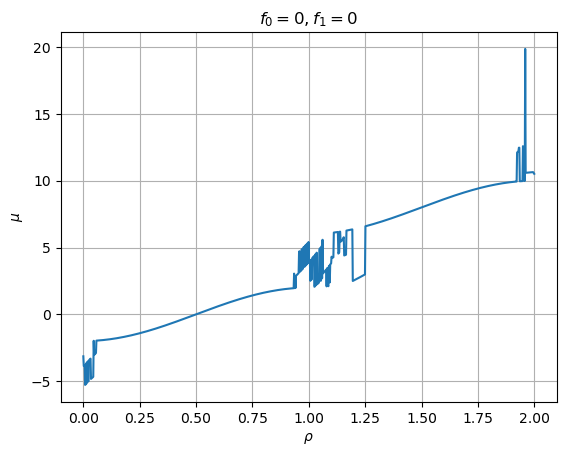

In [14]:
rho_array = np.linspace(0, 2, 1000)
mu_array, e_tilde_array = make_solution_arrays(rho_array, 8, 0, 0)
one_plot(rho_array, mu_array, r'$\rho$', r'$\mu$', r'$f_0 = 0, f_1=0$')